In [1]:
# Initialize Otter
import otter
grader = otter.Notebook()

# Project: Food Safety
## Cleaning and Exploring Data with Pandas
## Due Date: Thursday 11/14, 11:59 PM
## Collaboration Policy

Data science is a collaborative activity. While you may talk with others about the project, we ask that you **write your solutions individually**. If you do discuss the assignments with others please **include their names** at the top of your notebook.

**Collaborators**: Owen Larimer


## This Assignment

In this project, we will investigate restaurant food safety scores for restaurants in San Francisco. The scores and violation information have been [made available by the San Francisco Department of Public Health](https://data.sfgov.org/Health-and-Social-Services/Restaurant-Scores-LIVES-Standard/pyih-qa8i). The main goal for this assignment is to walk through the process of Data Cleaning and EDA. 


As we clean and explore these data, you will gain practice with:
* Reading simple csv files and using Pandas
* Working with data at different levels of granularity
* Identifying the type of data collected, missing values, anomalies, etc.
* Exploring characteristics and distributions of individual variables

## Before You Start

For each question in the assignment, please write down your answer in the answer cell(s) right below the question. 

**Important note: The local autograder tests will not be comprehensive. You can pass the automated tests in your notebook but still fail tests in the autograder.** Please be sure to check your results carefully.

Finally, unless we state otherwise, try to avoid using python for loops or list comprehensions.  The majority of this assignment can be done using builtin commands in Pandas and numpy.  


In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')

import zipfile
import os # Used to interact with the file system
'imports complete'

'imports complete'

## Obtaining the Data

## 1: Loading Food Safety Data

We have data, but we don't have any specific questions about the data yet. Let's focus on understanding the structure of the data; this involves answering questions such as:

* Is the data in a standard format or encoding?
* Is the data organized in records?
* What are the fields in each record?

Let's start by looking at the contents of `data.zip`. It's not a just single file but rather a compressed directory of multiple files. We could inspect it by uncompressing it using a shell command such as `!unzip data.zip`, but in this project we're going to do almost everything in Python for maximum portability.

### Question 1.1: Looking Inside and Extracting the Zip Files

Assign `my_zip` to a `zipfile.ZipFile` object representing `data.zip`, and assign `list_names` to a list of all the names of the contents in `data.zip`.

Hint: The [Python docs](https://docs.python.org/3/library/zipfile.html) describe how to create a `zipfile.ZipFile` object.

In [3]:
my_zip = zipfile.ZipFile("data.zip")
list_names = my_zip.namelist()
list_names

['data/',
 'data/bus.csv',
 'data/ins.csv',
 'data/ins2vio.csv',
 'data/legend.csv',
 'data/sf_zipcodes.json',
 'data/vio.csv']

In [4]:
grader.check("q1a")

q1a results: All test cases passed!

Now display the files' names and their sizes. Format your solution by printing each file and its size on a new line.

If you're not sure how to proceed, read about the attributes of a `ZipFile` object in the Python docs linked above.

In [5]:
 my_zip.infolist()

[<ZipInfo filename='data/' external_attr=0x30>,
 <ZipInfo filename='data/bus.csv' compress_type=deflate external_attr=0x20 file_size=665365 compress_size=156645>,
 <ZipInfo filename='data/ins.csv' compress_type=deflate external_attr=0x20 file_size=1860919 compress_size=184577>,
 <ZipInfo filename='data/ins2vio.csv' compress_type=deflate external_attr=0x20 file_size=1032799 compress_size=211529>,
 <ZipInfo filename='data/legend.csv' compress_type=deflate external_attr=0x20 file_size=120 compress_size=104>,
 <ZipInfo filename='data/sf_zipcodes.json' compress_type=deflate external_attr=0x20 file_size=474 compress_size=118>,
 <ZipInfo filename='data/vio.csv' compress_type=deflate external_attr=0x20 file_size=4213 compress_size=1367>]

In [6]:
for file in my_zip.infolist():
    print(f"Filename: {file.filename}, File Size: {file.file_size}")

Filename: data/, File Size: 0
Filename: data/bus.csv, File Size: 665365
Filename: data/ins.csv, File Size: 1860919
Filename: data/ins2vio.csv, File Size: 1032799
Filename: data/legend.csv, File Size: 120
Filename: data/sf_zipcodes.json, File Size: 474
Filename: data/vio.csv, File Size: 4213


Often when working with zipped data, we'll never unzip the actual zipfile. This saves space on our local computer. However, for this project the files are small, so we're just going to unzip everything. This has the added benefit that you can look inside the csv files using a text editor, which might be handy for understanding the structure of the files. The cell below will unzip the csv files into a subdirectory called `data`. Simply run this cell, unless your data.zip is in another location than your notebook.

In [7]:
my_zip.extractall()

The cell above created a folder called `data`, and in it there should be five CSV files. Let's open up `legend.csv` to see its contents. To do this, click on 'File/Open...' in the top left, then navigate to `data/` and click on `legend.csv`. The file will open up in another tab. You should see something that looks like:

    "Minimum_Score","Maximum_Score","Description"
    0,70,"Poor"
    71,85,"Needs Improvement"
    86,90,"Adequate"
    91,100,"Good"

You can simply click on 'x' in the browser tab to close `legend.csv`. You can do the same to close the tab with the list of files in the `data` directory.

### Question 1.2: Reading in the Files

Let's attempt to load `bus.csv`, `ins2vio.csv`, `ins.csv`, and `vio.csv` into pandas dataframes with the following names: `bus`, `ins2vio`, `ins`, and `vio` respectively.

*Note:* Because of character encoding issues one of the files (`bus`) will require an additional argument `encoding='ISO-8859-1'` when calling `pd.read_csv`. At some point in your future, you should read all about [character encodings](https://diveintopython3.problemsolving.io/strings.html). We won't discuss these in detail in 311.

In [8]:
bus = pd.read_csv("data/bus.csv", encoding = "ISO-8859-1")
ins2vio = pd.read_csv("data/ins2vio.csv")
ins = pd.read_csv("data/ins.csv")
vio = pd.read_csv("data/vio.csv")


#This code is essential for the autograder to function properly. Do not edit
ins_test = ins

Now that you've read in the files, let's try some `pd.DataFrame` methods ([docs](https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.html)).
Use the `DataFrame.head` method to show the top few lines of the `bus`, `ins`, and `vio` dataframes. To show multiple return outputs in one single cell, you can use `display()`. 

In [9]:
display()
bus.head(),ins.head(),vio.head()

(   business id column                         name                 address  \
 0                1000        HEUNG YUEN RESTAURANT            3279 22nd St   
 1              100010        ILLY CAFFE SF_PIER 39        PIER 39  K-106-B   
 2              100017  AMICI'S EAST COAST PIZZERIA             475 06th St   
 3              100026               LOCAL CATERING        1566 CARROLL AVE   
 4              100030             OUI OUI! MACARON  2200 JERROLD AVE STE C   
 
             city state postal_code     latitude    longitude  phone_number  
 0  San Francisco    CA       94110    37.755282  -122.420493         -9999  
 1  San Francisco    CA       94133 -9999.000000 -9999.000000   14154827284  
 2  San Francisco    CA       94103 -9999.000000 -9999.000000   14155279839  
 3  San Francisco    CA       94124 -9999.000000 -9999.000000   14155860315  
 4  San Francisco    CA       94124 -9999.000000 -9999.000000   14159702675  ,
                iid                    date  score     

The `DataFrame.describe` method can also be handy for computing summaries of numeric columns of our dataframes. Try it out with each of our 4 dataframes.

In [10]:
display()
bus.describe(), ins.describe(), vio.describe(), ins2vio.describe()

(       business id column     latitude    longitude  phone_number
 count         6253.000000  6253.000000  6253.000000  6.253000e+03
 mean         60448.948984 -5575.337966 -5645.817699  4.701819e+09
 std          36480.132445  4983.390142  4903.993683  6.667508e+09
 min             19.000000 -9999.000000 -9999.000000 -9.999000e+03
 25%          18399.000000 -9999.000000 -9999.000000 -9.999000e+03
 50%          75685.000000 -9999.000000 -9999.000000 -9.999000e+03
 75%          90886.000000    37.776494  -122.421553  1.415533e+10
 max         102705.000000    37.824494     0.000000  1.415988e+10,
               score
 count  26663.000000
 mean      47.227694
 std       46.094369
 min       -1.000000
 25%       -1.000000
 50%       76.000000
 75%       92.000000
 max      100.000000,
                  vid
 count      65.000000
 mean   103136.276923
 std        21.001866
 min    103102.000000
 25%    103119.000000
 50%    103135.000000
 75%    103153.000000
 max    103177.000000,
       

### Question 1.3: Identifying Issues with the Data

Refer to the cell above where you used the head() method on your four files again. This time, describe at least one potential problem with the data you see. Consider issues with missing values and bad data.


**Your reponse**: One potential problem with our "bus" dataframe is that there are many businesses that have a longitude and lattitude value of -9999 in each slot. If we want to analyze by geographic regions using latitude and longitude, we are going to get incorrect results because it looks like our values are incorrect. Another thing is that phone numbers are being treated as numbers and not strings, this implies that we will be able to do numeric operations on them but that doesn't really make sense to do. Ever. 

<!-- END QUESTION -->



We will explore each file in turn, including determining its granularity and primary keys and exploring many of the variables individually. Let's begin with the businesses file, which has been read into the `bus` dataframe.


# 2: Examining the Business Data File

From its name alone, we expect the `bus.csv` file to contain information about the restaurants. Let's investigate the granularity of this dataset.

In [11]:
bus.head()

,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number
0,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,-9999
1,100010,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999.000000,-9999.000000,14154827284
2,100017,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999.000000,-9999.000000,14155279839
3,100026,LOCAL CATERING,1566 CARROLL AVE,San Francisco,CA,94124,-9999.000000,-9999.000000,14155860315
4,100030,OUI OUI! MACARON,2200 JERROLD AVE STE C,San Francisco,CA,94124,-9999.000000,-9999.000000,14159702675


### Question 2.1

The `bus` dataframe contains a column called `business id column` which probably corresponds to a unique business id.  However, let's first rename that column to `bid`.  Modify the `bus` dataframe by renaming that column to `bid`. You should refer to [the documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html) if you're not sure how. 

**Note**: In practice we might want to do this renaming when the table is loaded but for grading purposes we will do it here.

In [12]:
bus = bus.rename(columns = {"business id column": "bid"})
bus.head()

,bid,name,address,city,state,postal_code,latitude,longitude,phone_number
0,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,-9999
1,100010,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999.000000,-9999.000000,14154827284
2,100017,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999.000000,-9999.000000,14155279839
3,100026,LOCAL CATERING,1566 CARROLL AVE,San Francisco,CA,94124,-9999.000000,-9999.000000,14155860315
4,100030,OUI OUI! MACARON,2200 JERROLD AVE STE C,San Francisco,CA,94124,-9999.000000,-9999.000000,14159702675


In [13]:
grader.check("q2a")

q2a results: All test cases passed!

### Question 2.2

Examining the entries in `bus`, is the `bid` unique for each record (i.e. each row of data)? Your code should compute the answer, i.e. don't just hard code `True` or `False`.

*Hint*: use `value_counts()` or `unique()` to determine if the `bid` series has any duplicates.

In [14]:
is_bid_unique = len(np.unique(np.unique(bus["bid"], return_counts = True)[1]))== 1
is_bid_unique

True

In [15]:
grader.check("q2b")

q2b results: All test cases passed!

### Question 2.3

In the two cells below create two **series** 

1. where the index is the `name` of the business and the value is the number of records with that `name`
2. where the index is the `address` of the business and the value is the number of records with that `address`

Order both series in descending order by count. You may need to use `groupby()`, `size()`, `sort_values()`, or `value_counts()`. 

In [16]:
name_counts = pd.Series(data = np.unique(bus["name"], return_counts = True)[1], index = np.unique(bus["name"], return_counts = True)[0]).sort_values(ascending = False)
name_counts.head(20)

Peet's Coffee & Tea                                       20
Starbucks Coffee                                          13
McDonald's                                                10
Jamba Juice                                               10
Proper Food                                                9
STARBUCKS                                                  9
Mixt Greens/Mixt                                           8
Specialty's Cafe & Bakery                                  8
Whole Foods Market                                         7
The Organic Coup                                           7
Starbucks                                                  7
Philz Coffee                                               7
Blue Bottle Coffee                                         7
Lee's Deli                                                 6
BlueStar Refreshment Services @ Uber Technologies, Inc     6
Bon Appetit @ Twitter                                      6
Annie's Hot Dogs & Pretz

In [17]:
grader.check("q2ci")

q2ci results: All test cases passed!

**Step 2**

<!--
BEGIN QUESTION
name: q2cii
points: 1
-->

In [18]:
address_counts =  pd.Series(data = np.unique(bus["address"], return_counts = True)[1], index = np.unique(bus["address"], return_counts = True)[0]).sort_values(ascending = False)
address_counts.head(10)

Off The Grid              39
428 11th St               34
3251 20th Ave             17
2948 Folsom St            17
Pier 41                   16
103 Horne Ave             14
24 Willie Mays Plaza      13
Off the Grid              11
2948 Folsom St.           10
1 United Nations Plaza    10
dtype: int64

In [19]:
grader.check("q2cii")

q2cii results: All test cases passed!

### Question 2.4

Based on the above calculations answer each of the following questions by filling the value in the variable.

1. What does each record represent?  
1. What is the minimal primary key?

In [20]:
len(np.unique(bus["postal_code"]))

63

In [21]:
bus.head()

,bid,name,address,city,state,postal_code,latitude,longitude,phone_number
0,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,-9999
1,100010,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999.000000,-9999.000000,14154827284
2,100017,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999.000000,-9999.000000,14155279839
3,100026,LOCAL CATERING,1566 CARROLL AVE,San Francisco,CA,94124,-9999.000000,-9999.000000,14155860315
4,100030,OUI OUI! MACARON,2200 JERROLD AVE STE C,San Francisco,CA,94124,-9999.000000,-9999.000000,14159702675


In [22]:
# What does each record represent?  Valid answers are:
#    "One location of a restaurant."
#    "A chain of restaurants."
#    "A city block."
q2d_part1 = "One location of a restaurant."

# What is the minimal primary key? Valid answers are:
#    "bid"
#    "bid, name"
#    "bid, name, address"
q2d_part2 = "bid"

In [23]:
grader.check("q2d")

q2d results: All test cases passed!

## 3: Cleaning the Business Data Postal Codes

The business data contains postal code information that we can use to aggregate the ratings over regions of the city.  Let's examine and clean the postal code field.  The postal code (sometimes also called a ZIP code) partitions the city into regions:

<img src="https://www.usmapguide.com/wp-content/uploads/2019/03/printable-san-francisco-zip-code-map.jpg" alt="ZIP Code Map" style="width: 600px">

### Question 3.1

How many restaurants are in each ZIP code? 

In the cell below, create a **series** where the index is the postal code and the value is the number of records with that postal code in descending order of count. You may need to use `groupby()`, `size()`, or `value_counts()`. Do you notice any odd/invalid zip codes?

In [24]:
zip_counts = bus.groupby(by = "postal_code").size()
print(zip_counts.to_string())
#thats weird -9999 definitely isnt valid, same with 00000 or zip codes that don't ave a hyphen and are 10 digits long
#tere are also two "postal codes" that are just titled CA/ca

postal_code
-9999         194
00000           1
64110           1
92672           1
94013           2
94014           1
94080           1
941             1
94101           2
94102         456
94102-5917      1
94103         562
941033148       1
94104         142
94105         249
94105-1420      1
94105-2907      1
94107         408
94108         229
94109         382
94110         555
941102019       1
94111         259
94112         192
94114         200
94115         230
94116          97
94117         189
94117-3504      1
94118         231
94120           1
94121         157
94122         255
94122-1909      1
94123         177
94123-3106      1
94124         218
94124-1917      1
94127          67
94129           1
94130           8
94131          49
94132         132
94133         398
94134          82
94143           5
94158          90
94188           2
94301           2
94518           1
94544           1
94602           1
94621           1
94901           1
95105           

In [25]:
grader.check("q3a")

q3a results: All test cases passed!

### Question 3.2

Answer the following questions about the `postal_code` column in the `bus` dataframe.

1. The ZIP code column is which of the following type of data:
    1. Quantitative Continuous
    1. Quantitative Discrete
    1. Qualitative Ordinal
    1. Qualitative Nominal    
1. What Python data type is used to represent a ZIP code?

*Note*: ZIP codes and postal codes are the same thing.

Please write your answers in the variables below:

In [26]:
type(bus['postal_code'][1]) #just checking that it's stored properly

str

In [27]:
# The ZIP code column is which of the following type of data:
#   "Quantitative Continuous" 
#   "Quantitative Discrete"
#   "Qualitative Ordinal"
#   "Qualitative Nominal"
q3b_part1 = 'Qualitative Nominal'

# What Python data type is used to represent a ZIP code? 
#    "str"
#    "int"
#    "bool"
#    "float"
q3b_part2 = 'str'

In [28]:
grader.check("q3b")

q3b results: All test cases passed!

### Question 3.3

In question 3a we noticed a large number of potentially invalid ZIP codes (e.g., "Ca").  These are likely due to data entry errors.  To get a better understanding of the potential errors in the zip codes we will:

Import a list of valid San Francisco ZIP codes by using `pd.read_json` to load the file `data/sf_zipcodes.json` and extract a **series** of type `str` containing the valid ZIP codes.  *Hint: set `dtype` when invoking `read_json`.

In [29]:
valid_zips = pd.read_json("data/sf_zipcodes.json", dtype = 'str')["zip_codes"]
valid_zips

0     94102
1     94103
2     94104
3     94105
4     94107
5     94108
6     94109
7     94110
8     94111
9     94112
10    94114
11    94115
12    94116
13    94117
14    94118
15    94119
16    94120
17    94121
18    94122
19    94123
20    94124
21    94125
22    94126
23    94127
24    94128
25    94129
26    94130
27    94131
28    94132
29    94133
30    94134
31    94137
32    94139
33    94140
34    94141
35    94142
36    94143
37    94144
38    94145
39    94146
40    94147
41    94151
42    94158
43    94159
44    94160
45    94161
46    94163
47    94164
48    94172
49    94177
50    94188
Name: zip_codes, dtype: object

In [30]:
grader.check("q3ci")

q3ci results: All test cases passed!

Construct a `DataFrame` containing only the businesses which DO NOT have valid ZIP codes.  You will probably want to use the `Series.isin` function. 

In [31]:
invalid_zip_bus = bus[~(bus["postal_code"].isin(valid_zips))]
invalid_zip_bus.head(20)

,bid,name,address,city,state,postal_code,latitude,longitude,phone_number
22,100126,Lamas Peruvian Food Truck,Private Location,San Francisco,CA,-9999,-9999.000000,-9999.000000,-9999
68,100417,"COMPASS ONE, LLC",1 MARKET ST. FL,San Francisco,CA,94105-1420,-9999.000000,-9999.000000,14154324000
96,100660,TEAPENTER,1518 IRVING ST,San Francisco,CA,94122-1909,-9999.000000,-9999.000000,14155868318
109,100781,LE CAFE DU SOLEIL,200 FILLMORE ST,San Francisco,CA,94117-3504,-9999.000000,-9999.000000,14155614215
144,101084,Deli North 200,1 Warriors Way Level 300 North East,San Francisco,CA,94518,-9999.000000,-9999.000000,-9999
156,101129,Vendor Room 200,1 Warriors Way Level 300 South West,San Francisco,CA,-9999,-9999.000000,-9999.000000,-9999
177,101192,Cochinita #2,2 Marina Blvd Fort Mason,San Francisco,CA,-9999,-9999.000000,-9999.000000,14150429222
276,102014,"DROPBOX (Section 3, Floor 7)",1800 Owens St,San Francisco,CA,-9999,-9999.000000,-9999.000000,-9999
295,102245,Vessell CA Operations (#4),2351 Mission St,San Francisco,CA,-9999,-9999.000000,-9999.000000,-9999
298,10227,The Napper Tandy,3200 24th St,San Francisco,CA,-9999,37.752581,-122.416482,-9999


In [32]:
grader.check("q3cii")

q3cii results: All test cases passed!

### Question 3.4

In the previous question, many of the businesses had a common invalid postal code that was likely used to encode a MISSING postal code.  Do they all share a potentially "interesting address"?

In the following cell, construct a **series** that counts the number of businesses at each `address` that have this single likely MISSING postal code value.  Order the series in descending order by count. 

After examining the output.  Answer the following question by filling in the appropriate variable. If we were to drop businesses with MISSING postal code values would a particular class of business be affected?  If you are unsure try to search the web for the most common addresses.


<!--
BEGIN QUESTION
name: q3d
points: 3
-->

In [33]:
missing_zip_address_count = bus[bus["postal_code"] == "-9999"].groupby(by = "address").agg({"postal_code": "count"}).sort_values(by = "postal_code", ascending = False)["postal_code"]
missing_zip_address_count

address
Off The Grid                                39
Off the Grid                                10
OTG                                          4
Approved Locations                           3
Approved Private Locations                   3
                                            ..
24 Willie Mays Pl Room 2142                  1
24 Willie Mays Pl Rm 2103                    1
24 Willie Mays Pl Field Level Rm 1.11.11     1
2399 Van Ness Ave                            1
Various Farmers Markets                      1
Name: postal_code, Length: 135, dtype: int64

In [34]:
grader.check("q3d")

q3d results: All test cases passed!

### Question 3.5

**True or False**:  If we were to drop businesses with MISSING postal code values, a particular class of business will be affected.

In [35]:
# True or False: 
#  If we were to drop businesses with MISSING postal code values 
#   a particular class of business be affected.
q3d_true_or_false = True

In [36]:
grader.check("q3e")

q3e results: All test cases passed!

### Question 3.6

Examine the `invalid_zip_bus` dataframe we computed above and look at the businesses that DO NOT have the special MISSING ZIP code value.  Some of the invalid postal codes are just the full 9 digit code rather than the first 5 digits.  Create a new column named `postal5` in the original `bus` dataframe which contains only the first 5 digits of the `postal_code` column.   Then, for any of the `postal5` ZIP code entries that were not a valid San Fransisco ZIP Code (according to `valid_zips`) set the entry to `None`.  

In [98]:
#not_9999 = invalid_zip_bus[~(bus["postal_code"] == "-9999")]
#bus["postal_code"].str[:5]
#not_9999["testing"] = not_9999["postal_code"].str[:5]
#not_9999

#testing cell
bus.shape

(6253, 10)

In [38]:
bus['postal5'] = bus["postal_code"].str[:5]
bus['postal5'] = np.where(~(bus["postal5"].isin(valid_zips)), None, bus["postal5"])

# Checking the corrected postal5 column
bus.loc[invalid_zip_bus.index, ['bid', 'name', 'postal_code', 'postal5']]

,bid,name,postal_code,postal5
22,100126,Lamas Peruvian Food Truck,-9999,None
68,100417,"COMPASS ONE, LLC",94105-1420,94105
96,100660,TEAPENTER,94122-1909,94122
109,100781,LE CAFE DU SOLEIL,94117-3504,94117
144,101084,Deli North 200,94518,None
...,...,...,...,...
6173,99369,HOTEL BIRON,94102-5917,94102
6174,99376,Mashallah Halal Food truck Ind,-9999,None
6199,99536,FAITH SANDWICH #2,94105-2907,94105
6204,99681,Twister,95112,None


In [39]:
grader.check("q3f")

q3f results: All test cases passed!

## 4: Investigate the Inspection Data

Let's now turn to the inspection DataFrame. Earlier, we found that `ins` has 4 columns named 
`iid`, `score`, `date` and `type`.  In this section, we determine the granularity of `ins` and investigate the kinds of information provided for the inspections. 

Let's start by looking again at the first 5 rows of `ins` to see what we're working with.

In [40]:
ins.head(5)

,iid,date,score,type
0,100010_20190329,03/29/2019 12:00:00 AM,-1,New Construction
1,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled
2,100017_20190417,04/17/2019 12:00:00 AM,-1,New Ownership
3,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled
4,100017_20190826,08/26/2019 12:00:00 AM,-1,Reinspection/Followup


### Question 4.1

The column `iid` probably corresponds to an inspection id.  Is it a primary key?  Write an expression (line of code) that evaluates to 'True' or 'False' based on whether all the values are unique. There are a number of ways you can do this, but `np.all` might be a helpful function for this problem. 

In [41]:
is_ins_iid_a_primary_key = len(np.unique(ins["iid"])) == len(ins["iid"])
is_ins_iid_a_primary_key

True

In [42]:
grader.check("q4a")

q4a results: All test cases passed!

### Question 4b

The column `iid` appears to be the composition of two numbers and the first number looks like a business id.  

First, create a new column called `bid` in the `ins` dataframe containing just the business id.  You will want to use `ins['iid'].str.split()` operation to do this.  Also be sure to convert the type of this column to `int`.

In [92]:
ins["bid"] = ins["iid"].str.split("_",expand = True)[0].astype('int')
ins.head()

C:\Users\Andy Ho\AppData\Local\Temp\ipykernel_9592\2062580382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ins["bid"] = ins["iid"].str.split("_",expand = True)[0].astype('int')


,iid,date,score,type,bid,timestamp,year,Missing Score
1,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010,2019-04-03,2019,False
3,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017,2019-08-16,2019,False
15,100041_20190520,05/20/2019 12:00:00 AM,83,Routine - Unscheduled,100041,2019-05-20,2019,False
20,100055_20190425,04/25/2019 12:00:00 AM,98,Routine - Unscheduled,100055,2019-04-25,2019,False
21,100055_20190912,09/12/2019 12:00:00 AM,82,Routine - Unscheduled,100055,2019-09-12,2019,False


In [93]:
grader.check("q4bi")

q4bi results: All test cases passed!

Compute how many values in this new column are invalid business ids (i.e. do not appear in the `bus['bid']` column). This is verifying a foreign key relationship. Consider using the `pd.Series.isin` function.

In [104]:
len(ins["bid"].unique())

5724

In [111]:
invalid_bid_count = np.sum(~ins["bid"].isin(bus['bid']))
invalid_bid_count

0

In [110]:
grader.check("q4bii")

q4bii results: All test cases passed!

Answer True or False, `ins['bid']` is a foreign key reference to `bus['bid']`.

In [47]:
# True or False: The column ins['bid'] is a foreign key 
#   referencing the bus['bid'] primary key.

q4b_is_foreign_key = True

In [48]:
grader.check("q4biii")

q4biii results: All test cases passed!

### Question 4.3

What if we are interested in a time component of the inspection data?  We need to examine the date column of each inspection.

What is the type of the individual `ins['date']` entries. You may want to grab the very first entry and use the `type` function in python. 

In [49]:
ins.date[0]

'03/29/2019 12:00:00 AM'

In [50]:
ins_date_type = type(ins.date[0])
ins_date_type

str

In [51]:
grader.check("q4ci")

q4ci results: All test cases passed!

Use `pd.to_datetime` to create a new `ins['timestamp']` column containing of `pd.Timestamp` objects.  These will allow us to do more date manipulation.

In [52]:
ins['timestamp'] = pd.to_datetime(ins.date)
ins

C:\Users\Andy Ho\AppData\Local\Temp\ipykernel_9592\988328282.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ins['timestamp'] = pd.to_datetime(ins.date)


,iid,date,score,type,bid,timestamp
0,100010_20190329,03/29/2019 12:00:00 AM,-1,New Construction,100010,2019-03-29
1,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010,2019-04-03
2,100017_20190417,04/17/2019 12:00:00 AM,-1,New Ownership,100017,2019-04-17
3,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017,2019-08-16
4,100017_20190826,08/26/2019 12:00:00 AM,-1,Reinspection/Followup,100017,2019-08-26
...,...,...,...,...,...,...
26658,999_20180924,09/24/2018 12:00:00 AM,-1,Routine - Scheduled,999,2018-09-24
26659,999_20181102,11/02/2018 12:00:00 AM,-1,Reinspection/Followup,999,2018-11-02
26660,999_20190909,09/09/2019 12:00:00 AM,80,Routine - Unscheduled,999,2019-09-09
26661,99_20171207,12/07/2017 12:00:00 AM,82,Routine - Unscheduled,99,2017-12-07


In [53]:
grader.check("q4cii")

q4cii results: All test cases passed!

What are the earliest and latest dates in our inspection data?  

*Hint: you can use `min` and `max` on dates of the correct type.*

In [54]:
earliest_date = np.min(ins.timestamp)
latest_date = np.max(ins.timestamp)

print("Earliest Date:", earliest_date)
print("Latest Date:", latest_date)

Earliest Date: 2016-10-04 00:00:00
Latest Date: 2019-11-28 00:00:00


In [55]:
grader.check("q4ciii")

q4ciii results: All test cases passed!

We probably want to examine the inspections by year. Create an additional `ins['year']` column containing just the year of the inspection.  Consider using `pd.Series.dt.year` to do this.

In [56]:
ins['year'] = ins.timestamp.dt.year
ins

,iid,date,score,type,bid,timestamp,year
0,100010_20190329,03/29/2019 12:00:00 AM,-1,New Construction,100010,2019-03-29,2019
1,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010,2019-04-03,2019
2,100017_20190417,04/17/2019 12:00:00 AM,-1,New Ownership,100017,2019-04-17,2019
3,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017,2019-08-16,2019
4,100017_20190826,08/26/2019 12:00:00 AM,-1,Reinspection/Followup,100017,2019-08-26,2019
...,...,...,...,...,...,...,...
26658,999_20180924,09/24/2018 12:00:00 AM,-1,Routine - Scheduled,999,2018-09-24,2018
26659,999_20181102,11/02/2018 12:00:00 AM,-1,Reinspection/Followup,999,2018-11-02,2018
26660,999_20190909,09/09/2019 12:00:00 AM,80,Routine - Unscheduled,999,2019-09-09,2019
26661,99_20171207,12/07/2017 12:00:00 AM,82,Routine - Unscheduled,99,2017-12-07,2017


In [57]:
grader.check("q4civ")

q4civ results: All test cases passed!

### Question 4.4

What is the relationship between the type of inspection over the 2016 to 2019 timeframe? 

Construct the following table by
1. Using `pivot_table` containing the number (`size`) of inspections for the given `type` and `year`.
1. Adding an extra `Total` column to the result using `sum`
1. Sort the results in descending order by the `Total`.

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th>year</th>      <th>2016</th>      <th>2017</th>      <th>2018</th>      <th>2019</th>      <th>Total</th>    </tr>    <tr>      <th>type</th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>    </tr>  </thead>  <tbody>    <tr>      <th>Routine - Unscheduled</th>      <td>966</td>      <td>4057</td>      <td>4373</td>      <td>4681</td>      <td>14077</td>    </tr>    <tr>      <th>Reinspection/Followup</th>      <td>445</td>      <td>1767</td>      <td>1935</td>      <td>2292</td>      <td>6439</td>    </tr>    <tr>      <th>New Ownership</th>      <td>99</td>      <td>506</td>      <td>528</td>      <td>459</td>      <td>1592</td>    </tr>    <tr>      <th>Complaint</th>      <td>91</td>      <td>418</td>      <td>512</td>      <td>437</td>      <td>1458</td>    </tr>    <tr>      <th>New Construction</th>      <td>102</td>      <td>485</td>      <td>218</td>      <td>189</td>      <td>994</td>    </tr>    <tr>      <th>Non-inspection site visit</th>      <td>51</td>      <td>276</td>      <td>253</td>      <td>231</td>      <td>811</td>    </tr>    <tr>      <th>New Ownership - Followup</th>      <td>0</td>      <td>45</td>      <td>219</td>      <td>235</td>      <td>499</td>    </tr>    <tr>      <th>Structural Inspection</th>      <td>1</td>      <td>153</td>      <td>50</td>      <td>190</td>      <td>394</td>    </tr>    <tr>      <th>Complaint Reinspection/Followup</th>      <td>19</td>      <td>68</td>      <td>70</td>      <td>70</td>      <td>227</td>    </tr>    <tr>      <th>Foodborne Illness Investigation</th>      <td>1</td>      <td>29</td>      <td>50</td>      <td>35</td>      <td>115</td>    </tr>    <tr>      <th>Routine - Scheduled</th>      <td>0</td>      <td>9</td>      <td>8</td>      <td>29</td>      <td>46</td>    </tr>    <tr>      <th>Administrative or Document Review</th>      <td>2</td>      <td>1</td>      <td>1</td>      <td>0</td>      <td>4</td>    </tr>    <tr>      <th>Multi-agency Investigation</th>      <td>0</td>      <td>0</td>      <td>1</td>      <td>2</td>      <td>3</td>    </tr>    <tr>      <th>Special Event</th>      <td>0</td>      <td>3</td>      <td>0</td>      <td>0</td>      <td>3</td>    </tr>    <tr>      <th>Community Health Assessment</th>      <td>1</td>      <td>0</td>      <td>0</td>      <td>0</td>      <td>1</td>    </tr>  </tbody></table>

In [58]:
ins_pivot = ins.pivot_table(columns = "year", index = "type", aggfunc = "count", values = 'bid').fillna(0)
ins_pivot["Total"] = ins_pivot[2016] + ins_pivot[2017] + ins_pivot[2018] + ins_pivot[2019]

ins_pivot_sorted = ins_pivot.sort_values("Total", ascending = False)
ins_pivot_sorted

year,2016,2017,2018,2019,Total
type,,,,,
Routine - Unscheduled,966.0,4057.0,4373.0,4681.0,14077.0
Reinspection/Followup,445.0,1767.0,1935.0,2292.0,6439.0
New Ownership,99.0,506.0,528.0,459.0,1592.0
Complaint,91.0,418.0,512.0,437.0,1458.0
New Construction,102.0,485.0,218.0,189.0,994.0
Non-inspection site visit,51.0,276.0,253.0,231.0,811.0
New Ownership - Followup,0.0,45.0,219.0,235.0,499.0
Structural Inspection,1.0,153.0,50.0,190.0,394.0
Complaint Reinspection/Followup,19.0,68.0,70.0,70.0,227.0


In [59]:
grader.check("q4di")

q4di results: All test cases passed!

Based on the above analysis, which year appears to have had a lot of businesses in newly constructed buildings?

In [60]:
year_of_new_construction = 2017

In [61]:
grader.check("q4dii")

q4dii results: All test cases passed!

### Question 4.5

Let's examine the inspection scores `ins['score']`

In [62]:
ins['score'].value_counts().head()

score
-1      12632
 100     1993
 96      1681
 92      1260
 94      1250
Name: count, dtype: int64

There are a large number of inspections with the `'score'` of `-1`.   These are probably missing values.  Let's see what type of inspections have scores and which do not. Create the following dataframe using steps similar to the previous question, and assign it to to the variable `ins_missing_score_pivot`.

You should observe that inspection scores appear only to be assigned to `Routine - Unscheduled` inspections.


<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th>Missing Score</th>      <th>False</th>      <th>True</th>      <th>Total</th>    </tr>    <tr>      <th>type</th>      <th></th>      <th></th>      <th></th>    </tr>  </thead>  <tbody>    <tr>      <th>Routine - Unscheduled</th>      <td>14031</td>      <td>46</td>      <td>14077</td>    </tr>    <tr>      <th>Reinspection/Followup</th>      <td>0</td>      <td>6439</td>      <td>6439</td>    </tr>    <tr>      <th>New Ownership</th>      <td>0</td>      <td>1592</td>      <td>1592</td>    </tr>    <tr>      <th>Complaint</th>      <td>0</td>      <td>1458</td>      <td>1458</td>    </tr>    <tr>      <th>New Construction</th>      <td>0</td>      <td>994</td>      <td>994</td>    </tr>    <tr>      <th>Non-inspection site visit</th>      <td>0</td>      <td>811</td>      <td>811</td>    </tr>    <tr>      <th>New Ownership - Followup</th>      <td>0</td>      <td>499</td>      <td>499</td>    </tr>    <tr>      <th>Structural Inspection</th>      <td>0</td>      <td>394</td>      <td>394</td>    </tr>    <tr>      <th>Complaint Reinspection/Followup</th>      <td>0</td>      <td>227</td>      <td>227</td>    </tr>    <tr>      <th>Foodborne Illness Investigation</th>      <td>0</td>      <td>115</td>      <td>115</td>    </tr>    <tr>      <th>Routine - Scheduled</th>      <td>0</td>      <td>46</td>      <td>46</td>    </tr>    <tr>      <th>Administrative or Document Review</th>      <td>0</td>      <td>4</td>      <td>4</td>    </tr>    <tr>      <th>Multi-agency Investigation</th>      <td>0</td>      <td>3</td>      <td>3</td>    </tr>    <tr>      <th>Special Event</th>      <td>0</td>      <td>3</td>      <td>3</td>    </tr>    <tr>      <th>Community Health Assessment</th>      <td>0</td>      <td>1</td>      <td>1</td>    </tr>  </tbody></table>



In [63]:
ins["score"] == -1

0         True
1        False
2         True
3        False
4         True
         ...  
26658     True
26659     True
26660    False
26661    False
26662    False
Name: score, Length: 26663, dtype: bool

In [64]:
ins["Missing Score"] = (ins["score"] == -1)
ins

,iid,date,score,type,bid,timestamp,year,Missing Score
0,100010_20190329,03/29/2019 12:00:00 AM,-1,New Construction,100010,2019-03-29,2019,True
1,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010,2019-04-03,2019,False
2,100017_20190417,04/17/2019 12:00:00 AM,-1,New Ownership,100017,2019-04-17,2019,True
3,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017,2019-08-16,2019,False
4,100017_20190826,08/26/2019 12:00:00 AM,-1,Reinspection/Followup,100017,2019-08-26,2019,True
...,...,...,...,...,...,...,...,...
26658,999_20180924,09/24/2018 12:00:00 AM,-1,Routine - Scheduled,999,2018-09-24,2018,True
26659,999_20181102,11/02/2018 12:00:00 AM,-1,Reinspection/Followup,999,2018-11-02,2018,True
26660,999_20190909,09/09/2019 12:00:00 AM,80,Routine - Unscheduled,999,2019-09-09,2019,False
26661,99_20171207,12/07/2017 12:00:00 AM,82,Routine - Unscheduled,99,2017-12-07,2017,False


In [65]:
ins_missing_score_pivot = ins.pivot_table(columns = "Missing Score", aggfunc = "count", index = "type",values = "iid").fillna(0)
ins_missing_score_pivot["Total"] = ins_missing_score_pivot[False] + ins_missing_score_pivot[True]
ins_missing_score_pivot.sort_values('Total', ascending = False)

Missing Score,False,True,Total
type,,,
Routine - Unscheduled,14031.0,46.0,14077.0
Reinspection/Followup,0.0,6439.0,6439.0
New Ownership,0.0,1592.0,1592.0
Complaint,0.0,1458.0,1458.0
New Construction,0.0,994.0,994.0
Non-inspection site visit,0.0,811.0,811.0
New Ownership - Followup,0.0,499.0,499.0
Structural Inspection,0.0,394.0,394.0
Complaint Reinspection/Followup,0.0,227.0,227.0


In [66]:
grader.check("q4e")

q4e results: All test cases passed!

Notice that inspection scores appear only to be assigned to `Routine - Unscheduled` inspections. It is reasonable that for inspection types such as `New Ownership` and `Complaint` to have no associated inspection scores, but we might be curious why there are no inspection scores for the `Reinspection/Followup` inspection type.

### Question 4.6


Now we'll connect our data using the `merge` function. Before we proceed, let's filter out missing scores from `ins` so that negative scores don't influence our results.

In [67]:
bus.head(1)

,bid,name,address,city,state,postal_code,latitude,longitude,phone_number,postal5
0,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,-9999,94110


In [68]:
ins = ins[ins["score"] > 0]
ins.merge(how = 'left', right = bus[["name", "address", "bid"]], on = "bid")

,iid,date,score,type,bid,timestamp,year,Missing Score,name,address
0,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010,2019-04-03,2019,False,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B
1,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017,2019-08-16,2019,False,AMICI'S EAST COAST PIZZERIA,475 06th St
2,100041_20190520,05/20/2019 12:00:00 AM,83,Routine - Unscheduled,100041,2019-05-20,2019,False,UNCLE LEE CAFE,3608 BALBOA ST
3,100055_20190425,04/25/2019 12:00:00 AM,98,Routine - Unscheduled,100055,2019-04-25,2019,False,Twirl and Dip,335 Martin Luther King Jr. Dr
4,100055_20190912,09/12/2019 12:00:00 AM,82,Routine - Unscheduled,100055,2019-09-12,2019,False,Twirl and Dip,335 Martin Luther King Jr. Dr
...,...,...,...,...,...,...,...,...,...,...
14026,999_20170714,07/14/2017 12:00:00 AM,77,Routine - Unscheduled,999,2017-07-14,2017,False,SERRANO'S PIZZA II,3274 21st St
14027,999_20180123,01/23/2018 12:00:00 AM,80,Routine - Unscheduled,999,2018-01-23,2018,False,SERRANO'S PIZZA II,3274 21st St
14028,999_20190909,09/09/2019 12:00:00 AM,80,Routine - Unscheduled,999,2019-09-09,2019,False,SERRANO'S PIZZA II,3274 21st St
14029,99_20171207,12/07/2017 12:00:00 AM,82,Routine - Unscheduled,99,2017-12-07,2017,False,J & M A-1 CAFE RESTAURANT LLC,779 Clay St


Create a new dataframe called `ins_named`. It should be exactly the same as `ins`, except that it should have the name and address of every business, as determined by the `bus` dataframe. If a `business_id` in `ins` does not exist in `bus`, the name and address should be given as `NaN`. 

*Note*: For quick reference, a pandas 'left' join keeps the keys from the left frame, so if `ins` is the left frame, all the keys from `ins` are kept and if a set of these keys don't have matches in the other frame, the columns from the other frame for these "unmatched" key rows contains NaNs.

In [69]:
ins_named = ins.merge(how = 'left', right = bus[["name", "address", "bid"]], on = "bid")

ins_named.head()

,iid,date,score,type,bid,timestamp,year,Missing Score,name,address
0,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010,2019-04-03,2019,False,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B
1,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017,2019-08-16,2019,False,AMICI'S EAST COAST PIZZERIA,475 06th St
2,100041_20190520,05/20/2019 12:00:00 AM,83,Routine - Unscheduled,100041,2019-05-20,2019,False,UNCLE LEE CAFE,3608 BALBOA ST
3,100055_20190425,04/25/2019 12:00:00 AM,98,Routine - Unscheduled,100055,2019-04-25,2019,False,Twirl and Dip,335 Martin Luther King Jr. Dr
4,100055_20190912,09/12/2019 12:00:00 AM,82,Routine - Unscheduled,100055,2019-09-12,2019,False,Twirl and Dip,335 Martin Luther King Jr. Dr


In [70]:
grader.check("q4f")

q4f results: All test cases passed!

### Question 4.7

Let's look at the 20 businesses with the lowest **median** score.  Order your results by the median score followed by the business id to break ties. The resulting table should look like:


*Hint: You may find the `as_index` argument important*

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>bid</th>      <th>name</th>      <th>median score</th>    </tr>  </thead>  <tbody>    <tr>      <th>3876</th>      <td>84590</td>      <td>Chaat Corner</td>      <td>54.0</td>    </tr>    <tr>      <th>4564</th>      <td>90622</td>      <td>Taqueria Lolita</td>      <td>57.0</td>    </tr>    <tr>      <th>4990</th>      <td>94351</td>      <td>VBowls LLC</td>      <td>58.0</td>    </tr>    <tr>      <th>2719</th>      <td>69282</td>      <td>New Jumbo Seafood Restaurant</td>      <td>60.5</td>    </tr>    <tr>      <th>222</th>      <td>1154</td>      <td>SUNFLOWER RESTAURANT</td>      <td>63.5</td>    </tr>    <tr>      <th>1991</th>      <td>39776</td>      <td>Duc Loi Supermarket</td>      <td>64.0</td>    </tr>    <tr>      <th>2734</th>      <td>69397</td>      <td>Minna SF Group LLC</td>      <td>64.0</td>    </tr>    <tr>      <th>3291</th>      <td>78328</td>      <td>Golden Wok</td>      <td>64.0</td>    </tr>    <tr>      <th>4870</th>      <td>93150</td>      <td>Chez Beesen</td>      <td>64.0</td>    </tr>    <tr>      <th>4911</th>      <td>93502</td>      <td>Smoky Man</td>      <td>64.0</td>    </tr>    <tr>      <th>5510</th>      <td>98995</td>      <td>Vallarta's Taco Bar</td>      <td>64.0</td>    </tr>    <tr>      <th>1457</th>      <td>10877</td>      <td>CHINA FIRST INC.</td>      <td>64.5</td>    </tr>    <tr>      <th>2890</th>      <td>71310</td>      <td>Golden King Vietnamese Restaurant</td>      <td>64.5</td>    </tr>    <tr>      <th>4352</th>      <td>89070</td>      <td>Lafayette Coffee Shop</td>      <td>64.5</td>    </tr>    <tr>      <th>505</th>      <td>2542</td>      <td>PETER D'S RESTAURANT</td>      <td>65.0</td>    </tr>    <tr>      <th>2874</th>      <td>71008</td>      <td>House of Pancakes</td>      <td>65.0</td>    </tr>    <tr>      <th>818</th>      <td>3862</td>      <td>IMPERIAL GARDEN SEAFOOD RESTAURANT</td>      <td>66.0</td>    </tr>    <tr>      <th>2141</th>      <td>61427</td>      <td>Nick's Foods</td>      <td>66.0</td>    </tr>    <tr>      <th>2954</th>      <td>72176</td>      <td>Wolfes Lunch</td>      <td>66.0</td>    </tr>    <tr>      <th>4367</th>      <td>89141</td>      <td>Cha Cha Cha on Mission</td>      <td>66.5</td>    </tr>  </tbody></table>

In [71]:
#help(bus.groupby)

In [72]:
twenty_lowest_scoring = ins_named.groupby(by = ["bid","name"], as_index = False).agg({"score": "median"}).sort_values(by = "score").head(20)
twenty_lowest_scoring = twenty_lowest_scoring.rename(columns = {"score": "median score"})
twenty_lowest_scoring

,bid,name,median score
3876,84590,Chaat Corner,54.0
4564,90622,Taqueria Lolita,57.0
4990,94351,VBowls LLC,58.0
2719,69282,New Jumbo Seafood Restaurant,60.5
222,1154,SUNFLOWER RESTAURANT,63.5
1991,39776,Duc Loi Supermarket,64.0
2734,69397,Minna SF Group LLC,64.0
4870,93150,Chez Beesen,64.0
4911,93502,Smoky Man,64.0
3291,78328,Golden Wok,64.0


In [73]:
grader.check("q4g")

q4g results: All test cases passed!

## 6: Explore with visualization

In this part we explore some of the basic inspection score values visually.

### Question 6.1
Let's look at the distribution of inspection scores. As we saw before when we called head on this data frame, inspection scores appear to be integer values. The discreteness of this variable means that we can use a barplot to visualize the distribution of the inspection score. Make a histogram of the scores in our ins dataset. 

In [74]:
np.min(ins["score"])

45

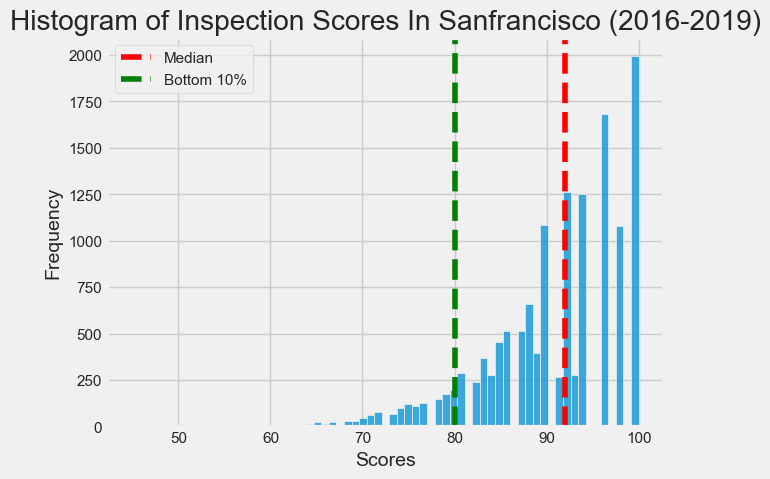

In [75]:
sns.histplot(data = ins, x = "score")
plt.xlabel("Scores"); plt.ylabel("Frequency");plt.title("Histogram of Inspection Scores In Sanfrancisco (2016-2019)")
plt.axvline(np.median(ins["score"]), color = "red", linestyle = "--", label = "Median")
plt.axvline(np.quantile(ins["score"],.10), color = "green", linestyle = "--", label = "Bottom 10%")
plt.legend()


### Question 6.2
Describe the qualities of the distribution of the inspections scores based on your bar plot. Consider the mode(s), symmetry, tails, gaps, and anomalous values. Are there any unusual features of this distribution? What do your observations imply about the scores?

**Your response**: The distribution of inspection scores are left skewed, with gaps towards the high end of values with no scores below 45. Theres also a mode at a score of perfect 100. One thing that's nice to know is that the median of restuarants score above 90 and the 10% qauntile of restuarants is at 80. As a consumer this implies that for the most 90% of places score higher than an 80, which should give confidence to customers that their food will be clean. 

### Question 6.3

Let's see which restaurant has had the most extreme improvement in its rating, aka scores. Let the "swing" of a restaurant be defined as the difference between its highest-ever and lowest-ever rating. **Only consider restaurants with at least 3 ratings, aka rated for at least 3 times (3 scores)!** Using whatever technique you want to use, assign `max_swing` to the name of restaurant that has the maximum swing.

*Note*: The "swing" is of a specific business. There might be some restaurants with multiple locations; each location has its own "swing".

In [76]:
ins_named.head(1)

,iid,date,score,type,bid,timestamp,year,Missing Score,name,address
0,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010,2019-04-03,2019,False,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B


In [77]:
grouped = ins_named.groupby(by = ["name", "address"]).agg(min_score=('score', 'min'), max_score=('score', 'max'), count=('score', 'count')).reset_index()
grouped_3 = grouped[grouped["count"] >= 3]
grouped_3["swing"] = grouped_3['max_score'] - grouped_3["min_score"]
sorted_3 = grouped_3.sort_values(by = "swing", ascending = False)

C:\Users\Andy Ho\AppData\Local\Temp\ipykernel_9592\2612118902.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_3["swing"] = grouped_3['max_score'] - grouped_3["min_score"]


The city would like to know if the state of food safety has been getting better, worse, or about average. This is a pretty vague and broad question, which you should expect as part of your future job as a data scientist! However for the ease of grading for this assignment, we are going to guide you through it and offer some specific directions to consider.

In [78]:
max_swing = sorted_3.iloc[0]["name"]
max_swing

'Lollipot'

In [79]:
grader.check("q6c")

q6c results: All test cases passed!

### Question 6.4

What's the relationship between the first and second scores for the businesses with 2 inspections in a year? Do they typically improve? For simplicity, let's focus on only 2018 for this problem, using `ins2018` data frame that will be created for you below.

First, make a dataframe called `scores_pairs_by_business` indexed by `business_id` (containing only businesses with exactly 2 inspections in 2018). This dataframe contains the field score_pair consisting of the score pairs ordered chronologically [first_score, second_score].

Plot these scores. That is, make a scatter plot to display these pairs of scores. Include on the plot a reference line with slope 1.

You may find the functions `sort_values`, `groupby`, `filter` and `agg` helpful, though not all necessary.

The first few rows of the resulting table should look something like:

|  **bid**   | **score_pair** |
|-----|------------|
| 48  | [94, 87]   |
| 66  | [98, 98]   |
| 146  | [81, 90]   |
| 184  | [90, 96]  |
| 273  | [83, 84]   |

In the cell below, create `scores_pairs_by_business` as described above. Each score pair must be a list type; numpy arrays will not pass the autograder.

*Hint*: There are many different functions you can aggregate by when using `.agg`, including `list` and `len`.

In [80]:
ins2018 = ins[ins['year'] == 2018]
# Create the dataframe here
bid_grouped = ins2018.groupby(by = "bid")["score"].agg(list).reset_index()
scores_pairs_by_business = bid_grouped[bid_grouped["score"].apply(len) == 2].rename(columns = {"score": "score_pair"}).set_index("bid")
scores_pairs_by_business

,score_pair
bid,
48,"[94, 87]"
66,"[98, 98]"
146,"[81, 90]"
184,"[90, 96]"
273,"[83, 84]"
...,...
95621,"[100, 100]"
95628,"[75, 75]"
95674,"[100, 96]"


In [81]:
grader.check("q6d")

q6d results: All test cases passed!

Now, create your scatter plot in the cell below.

*Hint*: You may find it convenient to use the `zip()` function to unzip scores in the list.

Text(0.5, 1.0, 'Scatterplot of Food Inspection Scores, First vs Second')

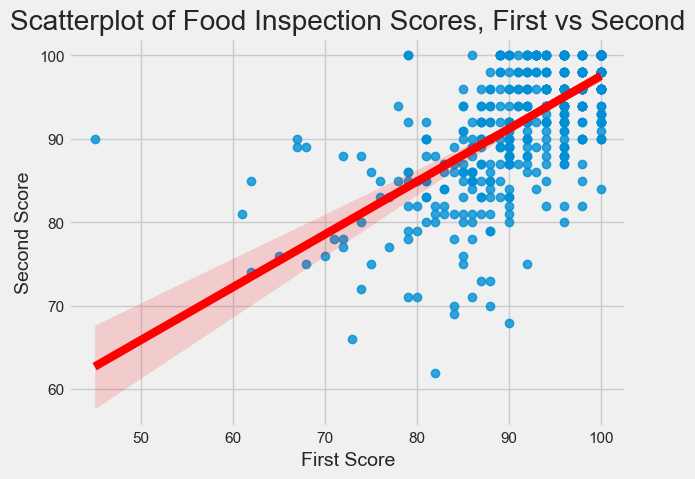

In [82]:
x_vals, y_vals = zip(*scores_pairs_by_business["score_pair"])
x = np.array(x_vals)
y = np.array(y_vals)
sns.regplot(x = x, y = y, line_kws = {'color':'red'})
plt.ylabel("Second Score")
plt.xlabel("First Score")
plt.title("Scatterplot of Food Inspection Scores, First vs Second")

### Question 6.5

Another way to compare the scores from the two inspections is to examine the difference in scores. Subtract the first score from the second in `scores_pairs_by_business`. Make a histogram of these differences in the scores. We might expect these differences to be positive, indicating an improvement from the first to the second inspection.

Hint: Unzip the scores in the same was as you did above. 

Hint: Convert the scores into numpy arrays to make them easier to deal with.

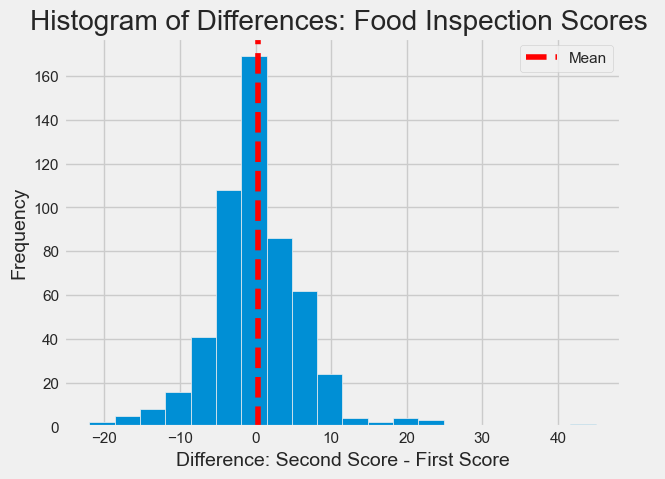

In [83]:
diff = y- x
plt.hist(diff,bins = 20)
plt.xlabel("Difference: Second Score - First Score")
plt.ylabel("Frequency")
plt.title("Histogram of Differences: Food Inspection Scores ")
plt.axvline(np.mean(diff), linestyle = "--", color = "red", label = "Mean")
plt.legend()

### Question 6.6

If restaurants' scores tend to improve from the first to the second inspection, what do you expect to see in the scatter plot that you made in question 7c? What do you oberve from the plot? Are your observations consistent with your expectations? 

*Hint*: What does the slope represent?

**Your response**: If restaurants' scores improves from first to second inspection we would expect to see a general positive association in the scatterplot from question 7c. This is because the y-values represent the second score, and a postiive slope corresponds to an increase in second score when given a first score. These observations are consistent with our expectations.

### Question 6.7

If a restaurant's score improves from the first to the second inspection, how would this be reflected in the histogram of the difference in the scores that you made in question 7d? What do you oberve from the plot? Are your observations consistent with your expectations? Explain your observations in the language of Statistics: for instance, the center, the spread, the deviation etc.

In [84]:
np.std(diff), np.mean(diff), np.median(diff)

(6.225021428151197, 0.30654205607476637, 0.0)

**Your response**: If restaurants scores improved from the first to second inspection we would see this in the histogram with it being centered above 0. It would also ideally would show a right tail, corresponding to resturants making large improvements. But most importantly we want most of the data to be above 0. This is halfway reflected in our histogram above, as it's centered basically at 0 (the mean is .306), but for the most part the graph is consistent with our observations. The histogram of differences is normally distributed, with the median at 0. This indicates that for the most part some restuarants did not improve. As far as analysis goes, it's important to consider though that some resturants didn't "need" to improve because the mode for resturant scores was at a perfect 100. Negative differences in these would indicate that things got worse, but in reality moving from a 100 to a 90-something is sort of irrevelavant. For the most part, we cannot gather that much information from the histogram.

## Congratulations! You have finished Project 1! ##

To double-check your work, the cell below will rerun all of the autograder tests.

In [85]:
grader.check_all()

q1a results: All test cases passed!

q2a results: All test cases passed!

q2b results: All test cases passed!

q2ci results: All test cases passed!

q2cii results: All test cases passed!

q2d results: All test cases passed!

q3a results: All test cases passed!

q3b results: All test cases passed!

q3ci results: All test cases passed!

q3cii results: All test cases passed!

q3d results: All test cases passed!

q3e results: All test cases passed!

q3f results: All test cases passed!

q4a results: All test cases passed!

q4bi results: All test cases passed!

q4bii results: All test cases passed!

q4biii results: All test cases passed!

q4ci results: All test cases passed!

q4cii results: All test cases passed!

q4ciii results: All test cases passed!

q4civ results: All test cases passed!

q4di results: All test cases passed!

q4dii results: All test cases passed!

q4e results: All test cases passed!

q4f results: All test cases passed!

q4g results: All test cases passed!

q6c results: Al

## Submission

Make sure you have run all cells in your notebook in order. Then execute the following in the File menu

* Save and Checkpoint
* Close and Halt

Then upload your notebook to Canvas Assignment Project 1.